In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(10), df.shape

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 5            5      116             74              0        0  25.6   
 6            3       78             50             32       88  31.0   
 7           10      115              0              0        0  35.3   
 8            2      197             70             45      543  30.5   
 9            8      125             96              0        0   0.0   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3             

<Axes: xlabel='Outcome', ylabel='count'>

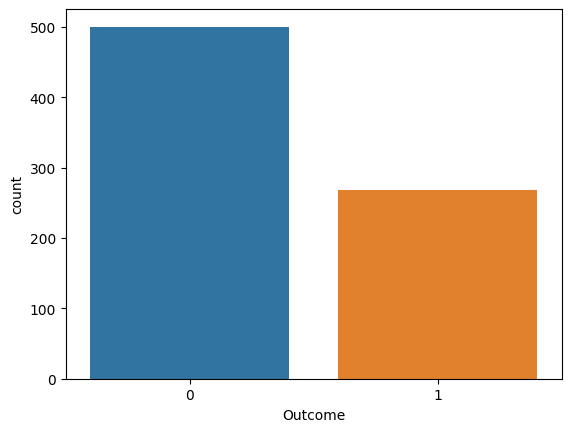

In [4]:
sns.countplot(x = "Outcome", data = df)

<Axes: xlabel='Age', ylabel='Outcome'>

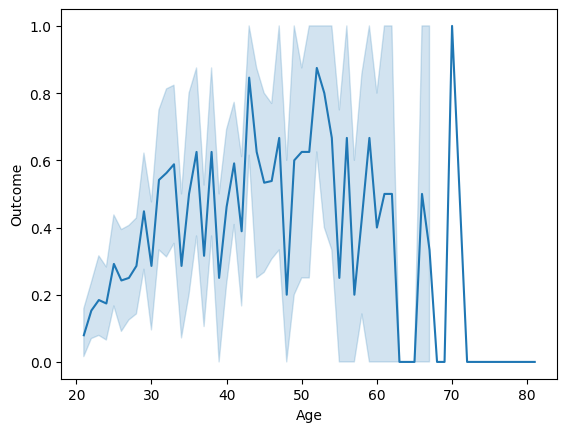

In [5]:
sns.lineplot(x = "Age", y = "Outcome", data = df)

<Axes: xlabel='Insulin', ylabel='Outcome'>

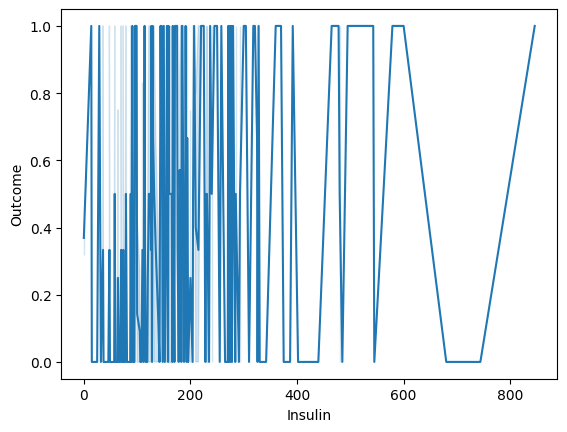

In [6]:
sns.lineplot(x = "Insulin", y = "Outcome", data = df)

<Axes: xlabel='Pregnancies', ylabel='count'>

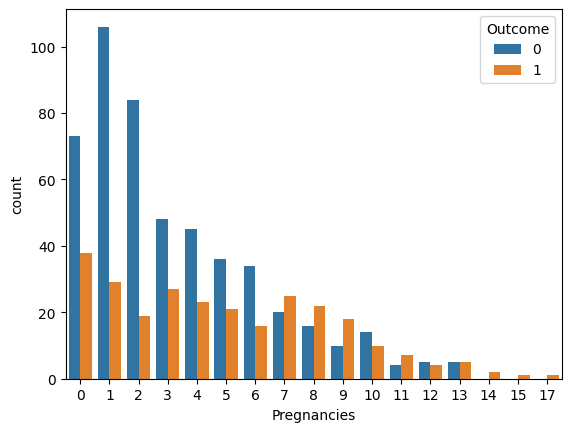

In [7]:
sns.countplot(x = "Pregnancies", hue = "Outcome", data = df)

<Axes: xlabel='Age', ylabel='Glucose'>

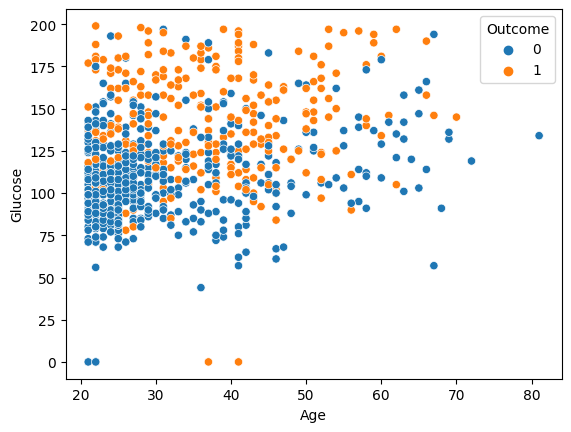

In [8]:
sns.scatterplot(x = "Age", y = "Glucose", hue = "Outcome", data = df)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
df.groupby("Outcome").count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [13]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [14]:
x.shape, y.shape

((768, 8), (768,))

In [15]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [16]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Model Creation

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=0)

In [18]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
prediction = model.predict(x_test)

In [22]:
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [23]:
accuracy_score(prediction, y_test)*100

82.46753246753246

# Random Forest Classifier

In [44]:
model = RandomForestClassifier(n_estimators= 56, criterion="gini")
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=56)

#### Prediction On Test Data

In [45]:
predict1 = model.predict(x_test)
accuracy_score(predict1, y_test)*100

83.11688311688312

#### Prediction On Train Data

In [47]:
predict1 = model.predict(x_train)
accuracy_score(predict1, y_train)*100

99.8371335504886